In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)

2.14.0


In [7]:
# Fetch the MNIST data
(X_train, t_train), (X_test, t_test) = tf.keras.datasets.mnist.load_data()
print("Training data:", X_train.shape, t_train.shape)
print("Test data:", X_test.shape, t_test.shape)

# Normalize the values
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

# Mean removal
X_mean = np.mean(X_train, axis=0)
X_train -= X_mean
X_test -= X_mean

# One-hot encoding
T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [11]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model = tf.keras.models.Sequential()

# Input layer representing the (28, 28) image
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

# Convolutional layer with 16 feature maps using 3x3 filters
model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

# Max-pooling layerover 2x2 regions
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model.add(tf.keras.layers.Flatten())

# Fully-connected layer
model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('relu'))

# Softmax output layer over 10 classes
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax'))

# Learning rule
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 activation (Activation)     (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 100)               270500    
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                        

In [12]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
model.fit(
    X_train, T_train, # training data
    batch_size=64,  # batch size
    epochs=10, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/10
844/844 [==============================] - 24s 28ms/step - loss: 0.3222 - accuracy: 0.9054 - val_loss: 0.1105 - val_accuracy: 0.9718
Epoch 2/10
844/844 [==============================] - 24s 28ms/step - loss: 0.1051 - accuracy: 0.9681 - val_loss: 0.0699 - val_accuracy: 0.9803
Epoch 3/10
844/844 [==============================] - 24s 29ms/step - loss: 0.0666 - accuracy: 0.9797 - val_loss: 0.0610 - val_accuracy: 0.9833
Epoch 4/10
844/844 [==============================] - 19s 22ms/step - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0543 - val_accuracy: 0.9838
Epoch 5/10
844/844 [==============================] - 23s 27ms/step - loss: 0.0381 - accuracy: 0.9885 - val_loss: 0.0537 - val_accuracy: 0.9827
Epoch 6/10
844/844 [==============================] - 20s 24ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0471 - val_accuracy: 0.9857
Epoch 7/10
844/844 [==============================] - 24s 28ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0492 - val_accuracy:

In [13]:
score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04546932503581047
Test accuracy: 0.9861000180244446


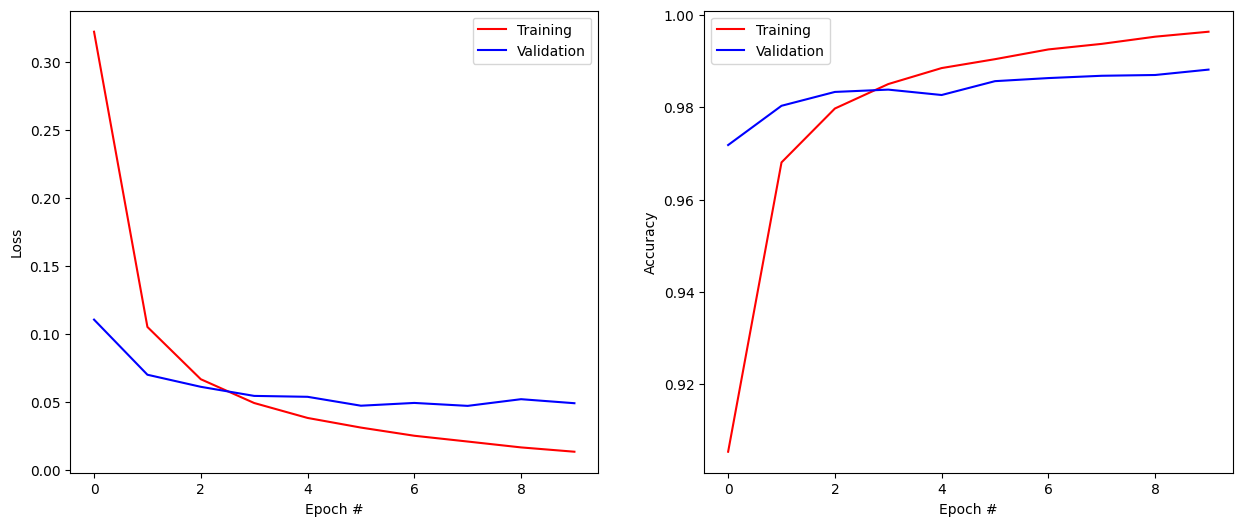

In [15]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#answer 1

**Q:** What do you think of 1) the final accuracy and 2) the training time, compared to the MLP of last time?

**A:** The accuracy is pretty high, and keeps increasing and havent plateued with the number of epoch. which means more would still be beneficial. the training time could be faster, as in the previous assignment it was done faster with more parameters and same number of epoch.


**Q:** When does your network start to overfit? How to recognize it?

**A:** When the validation loss increases as the training loss still decreases, meaning it still measures the data that has already been learnt, but increases to generalize new unseen data (validation loss)

**Q:** Try different values for the batch size (16, 32, 64, 128..). What is its influence?

**A:** Changes of the batch number doesnt change the accuracy score, but it takes more time with higher batch number.


In [16]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
model.fit(
    X_train, T_train, # training data
    batch_size=64,  # batch size
    epochs=10, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 2/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0087 - accuracy: 0.9979 - val_loss: 0.0492 - val_accuracy: 0.9878
Epoch 3/10
844/844 [==============================] - 20s 24ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0580 - val_accuracy: 0.9862
Epoch 4/10
844/844 [==============================] - 20s 24ms/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0577 - val_accuracy: 0.9870
Epoch 5/10
844/844 [==============================] - 21s 25ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0561 - val_accuracy: 0.9882
Epoch 6/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.0523 - val_accuracy: 0.9880
Epoch 7/10
844/844 [==============================] - 19s 23ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0508 - val_accuracy:

In [22]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model1 = tf.keras.models.Sequential()


model1.add(tf.keras.layers.Input(shape=(10,)))

# Convolutional layer with 16 feature maps using 3x3 filters
model1.add(tf.keras.layers.Input(shape=(10,)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='valid', name='conv1'))
model.add(tf.keras.layers.Activation('relu'))

# Max-pooling layerover 2x2 regions
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model.add(tf.keras.layers.Flatten())

# Fully-connected layer
model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('relu'))

# Softmax output layer over 10 classes
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax'))

# Learning rule
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model.summary())

ValueError: ignored

In [ ]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
model.fit(
    X_train, T_train, # training data
    batch_size=128,  # batch size change to 32
    epochs=10, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

In [ ]:
score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Answer 2

In [23]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model1 = tf.keras.models.Sequential()

# Input layer representing the (28, 28) image
model1.add(tf.keras.layers.Input(shape=(28, 28, 1)))

# Convolutional layer with 16 feature maps using 3x3 filters
model1.add(tf.keras.layers.Conv2D(16, (3, 3), padding='valid'))
model1.add(tf.keras.layers.Activation('relu'))

# Max-pooling layerover 2x2 regions
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model1.add(tf.keras.layers.Flatten())

# Fully-connected layer
model1.add(tf.keras.layers.Dense(units=100))
model1.add(tf.keras.layers.Activation('relu'))

# Softmax output layer over 10 classes
model1.add(tf.keras.layers.Dense(units=10))
model1.add(tf.keras.layers.Activation('softmax'))
model.add(tf.keras.layers.Dense(units=400, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.000001)))
model.add(tf.keras.layers.Dropout(0.01))


# Learning rule
optimizer1 = tf.keras.optimizers.legacy.SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# Loss function
model1.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer1, # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 activation (Activation)     (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 100)               270500    
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                        

In [24]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
model1.fit(
    X_train, T_train, # training data
    batch_size=128,  # batch size
    epochs=10, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/10
422/422 [==============================] - 17s 39ms/step - loss: 0.1886 - accuracy: 0.9441 - val_loss: 0.0597 - val_accuracy: 0.9835
Epoch 2/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0498 - val_accuracy: 0.9878
Epoch 3/10
422/422 [==============================] - 17s 41ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0465 - val_accuracy: 0.9883
Epoch 4/10
422/422 [==============================] - 17s 41ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0480 - val_accuracy: 0.9880
Epoch 5/10
422/422 [==============================] - 30s 71ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0585 - val_accuracy: 0.9862
Epoch 6/10
422/422 [==============================] - 18s 43ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0526 - val_accuracy: 0.9885
Epoch 7/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0553 - val_accuracy:

Q: Print the shape of these weights and relate them to the network.

In [14]:
W = model.layers[0].get_weights()[0]
W.shape

(3, 3, 1, 16)

Q: Visualize with imshow() each of the 16 filters of the first convolutional layer. Interpret what kind of operation they perform on the image.


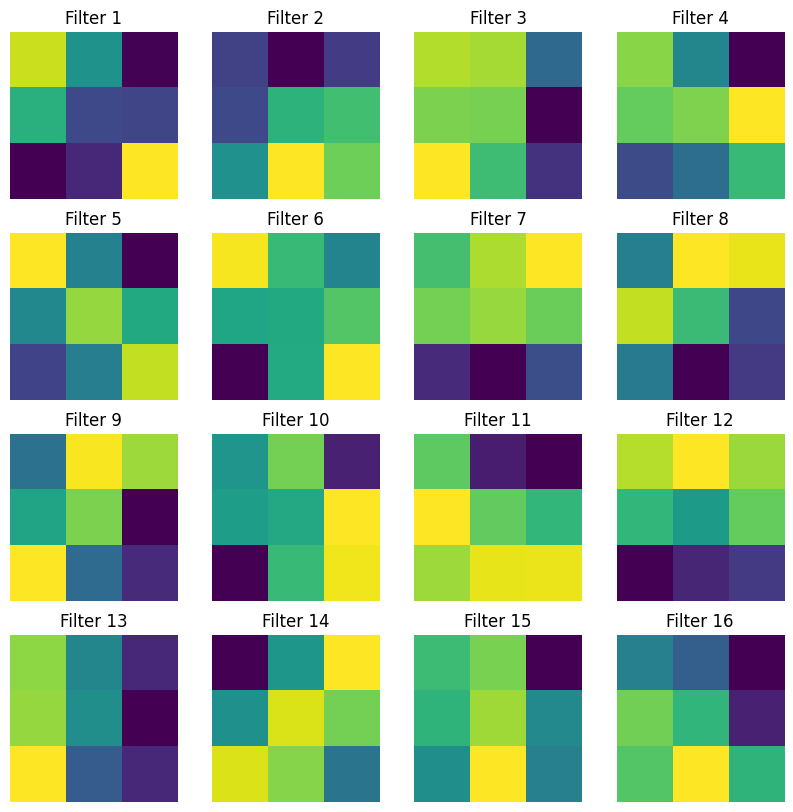

In [25]:
if len(W.shape) == 4:
    # Visualize each filter in a 4x4 grid
    num_filters = W.shape[3]
    sqrt_filters = int(np.ceil(np.sqrt(num_filters)))

    plt.figure(figsize=(10, 10))

    for i in range(num_filters):
        plt.subplot(sqrt_filters, sqrt_filters, i+1)
        plt.imshow(W[:, :, 0, i], cmap='viridis', interpolation='nearest')  # Assuming a single channel for simplicity
        plt.title(f'Filter {i+1}')
        plt.axis('off')

    plt.show()
else:
    print("The first layer is not a convolutional layer.")

###Visualizing the data

1


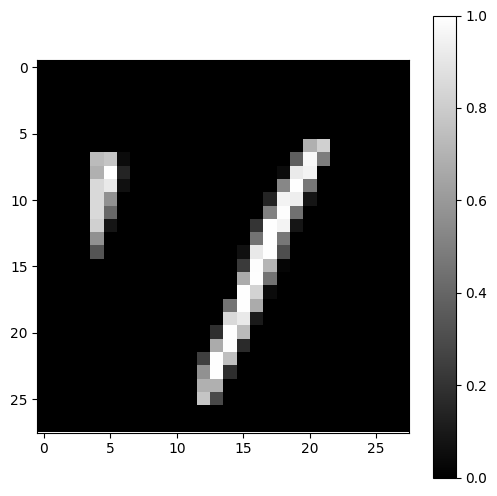

In [26]:
idx = 31727 # or any other digit
x = X_train[idx, :, :, :].reshape(1, 28, 28, 1)
t = t_train[idx]

print(t)

plt.figure(figsize=(6, 6))
plt.imshow(x[0, :, :, 0] + X_mean[:, :, 0], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [27]:
model1.predict(x)

1/1 [==============================] - 0s 102ms/step


array([[8.3264290e-08, 9.7214049e-01, 2.3046718e-08, 1.8626345e-07,
        5.5838963e-03, 1.6007449e-11, 1.7659592e-07, 2.2275193e-02,
        6.4632637e-09, 5.0676720e-11]], dtype=float32)

**Q:** Visualize the output of the network for different examples. Do these ambiguities happen often?

1/1 [==============================] - 0s 128ms/step


<ipython-input-30-c7b6d08c4572>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


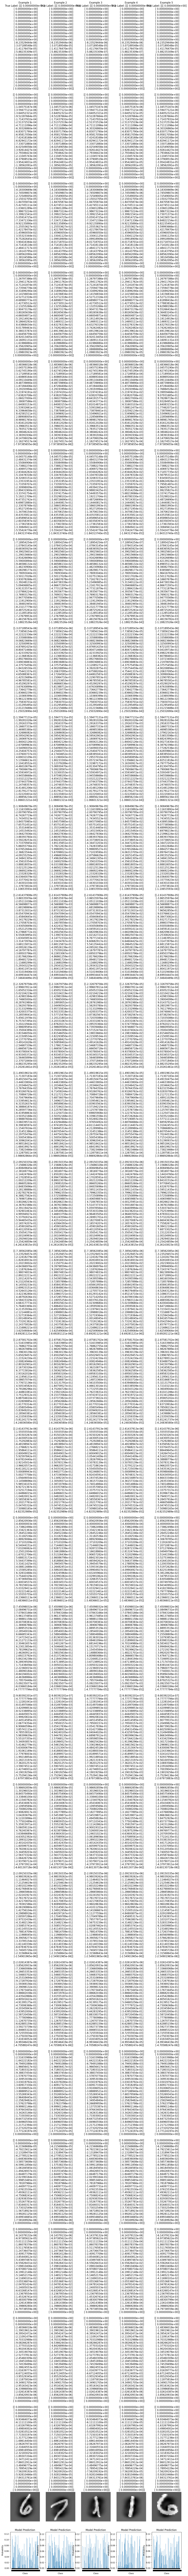

In [30]:
num_examples = 5
random_indices = np.random.choice(len(X_test), num_examples, replace=False)

# Predict the output for the chosen examples
predictions = model.predict(X_test[random_indices])

# Visualize the input images and model predictions
plt.figure(figsize=(15, 7))
for i in range(num_examples):
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_test[random_indices[i]], cmap='gray')  # Adjust the cmap based on your input data
    plt.title(f'Example {i + 1}\nTrue Label: {X_test[random_indices[i]]}')
    plt.axis('off')

    plt.subplot(2, num_examples, i + 1 + num_examples)
    plt.bar(range(predictions.shape[1]), predictions[i])
    plt.title('Model Prediction')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.xticks(range(predictions.shape[1]))

plt.tight_layout()
plt.show()

**Q:** Visualize the 16 feature maps using `subplot()`. Relate these activation with the filters you have visualized previously.

1/1 [==============================] - 0s 41ms/step


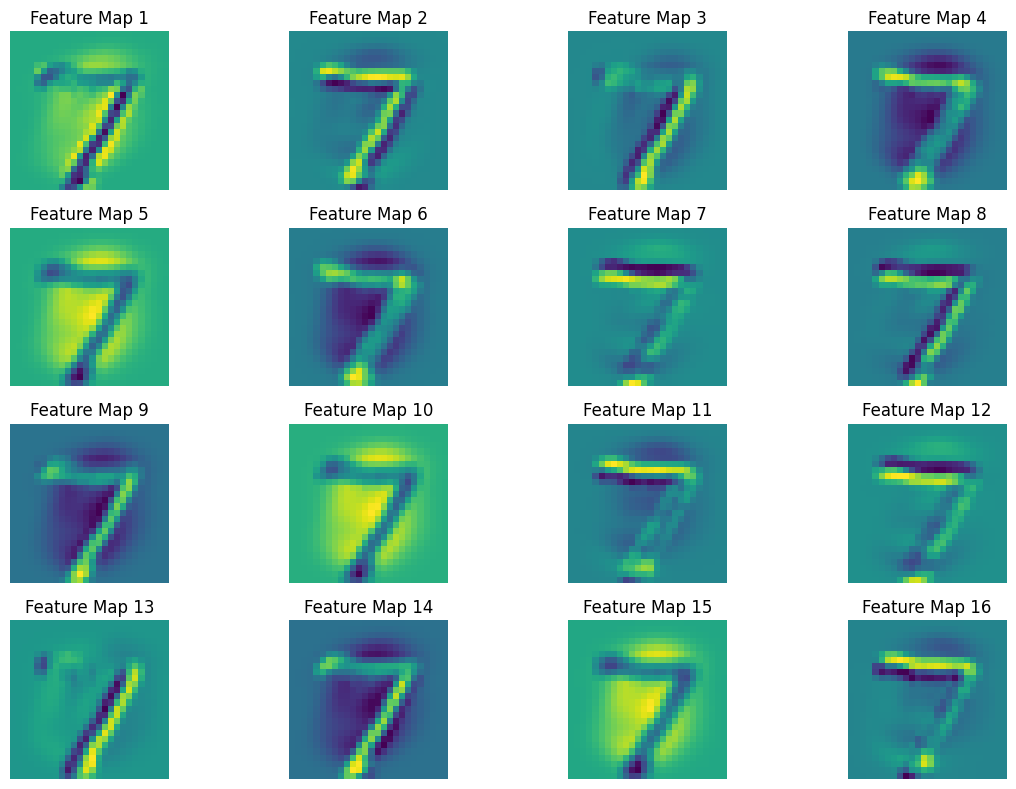

In [29]:
model_conv = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
example_index = 0
x = np.expand_dims(X_test[example_index], axis=0)  # Assuming X_test is your test data

# Get the feature maps
feature_maps = model_conv.predict([x])

# Visualize the feature maps
num_feature_maps = feature_maps.shape[-1]

plt.figure(figsize=(12, 8))
for i in range(num_feature_maps):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis', interpolation='nearest')
    plt.title(f'Feature Map {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

**Q:** Do the same with the output of the first max-pooling layer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 activation (Activation)     (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 100)               270500    
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                        

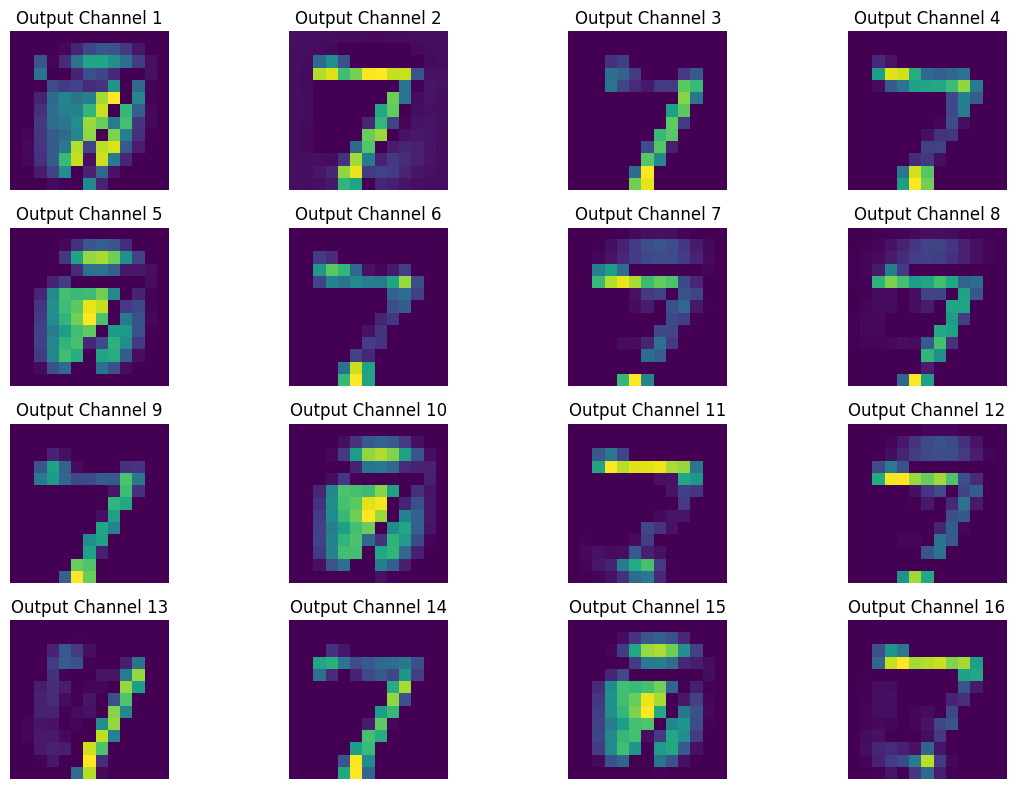

In [31]:
model.summary()
max_pooling_index = 2

# Create a new model that outputs the activation of the first max-pooling layer
model_max_pool = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[max_pooling_index].output)

# Choose an example for visualization
example_index = 0
example = np.expand_dims(X_test[example_index], axis=0)  # Assuming X_test is your test data

# Get the max-pooling layer output by calling predict on the new model
max_pool_output = model_max_pool.predict([example])

# Visualize the output of the first max-pooling layer
num_output_channels = max_pool_output.shape[-1]

plt.figure(figsize=(12, 8))
for i in range(num_output_channels):
    plt.subplot(4, 4, i+1)
    plt.imshow(max_pool_output[0, :, :, i], cmap='viridis', interpolation='nearest')
    plt.title(f'Output Channel {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()